In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict

## Gather Data

In [5]:
df18 = pd.read_csv("2018survey_results_public.csv")
df19 = pd.read_csv("2019survey_results_public.csv",error_bad_lines=False,engine='python')
df20 = pd.read_csv("2020survey_results_public.csv")
schema = pd.read_csv("survey_results_schema.csv")
pd.set_option("display.max_colwidth", -1)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
Skipping line 71825: unexpected end of data
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """


## Business Understanding

There is a lot of talk about which programming languages are the most popular. This topic is so popular that we see many Youtube videos on "Top 5 programming languages to learn in 2020" or "Learn this programming language to get a job". Let's see the trend of the most popular programming languages from 2018 to 2020 to give us an understanding of which one's are most popular and which ones are increasing in popularity.

Below we will take a look at the question related to this:

In [6]:
list(schema[schema['Column']=='LanguageWorkedWith']['QuestionText'])

['Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)']

## Data Understanding

In [7]:
df18['LanguageWorkedWith'].value_counts().reset_index()

,index,LanguageWorkedWith
0,C#;JavaScript;SQL;HTML;CSS,1287
1,JavaScript;PHP;SQL;HTML;CSS,1107
2,Java,859
3,C#;JavaScript;SQL;TypeScript;HTML;CSS,798
4,JavaScript;PHP;SQL;HTML;CSS;Bash/Shell,719
...,...,...
23273,C++;JavaScript;PHP;Python;Bash/Shell,1
23274,Assembly;C;C++;Groovy;Java;JavaScript;Python;VB.NET;Visual Basic 6;Delphi/Object Pascal;HTML;CSS;Bash/Shell,1
23275,JavaScript;PHP;TypeScript;Delphi/Object Pascal;HTML;CSS,1
23276,Assembly;C;C++;C#;Go,1


In [8]:
df19['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                          1210
C#;HTML/CSS;JavaScript;SQL                                           1165
HTML/CSS;JavaScript                                                  982 
C#;HTML/CSS;JavaScript;SQL;TypeScript                                807 
HTML/CSS;JavaScript;PHP                                              746 
                                                                    ...  
HTML/CSS;JavaScript;R;SQL;Other(s):                                  1   
Bash/Shell/PowerShell;C;C++;C#;Java;Kotlin;SQL                       1   
C;C#;Dart;Go;HTML/CSS;Java;JavaScript;Python;SQL;Swift;TypeScript    1   
C#;HTML/CSS;Objective-C;SQL                                          1   
Bash/Shell/PowerShell;C++;Python;Rust;Other(s):                      1   
Name: LanguageWorkedWith, Length: 17318, dtype: int64

In [9]:
df20['LanguageWorkedWith'].value_counts()

HTML/CSS;JavaScript;PHP;SQL                                                              1073
HTML/CSS;JavaScript                                                                      900 
C#;HTML/CSS;JavaScript;SQL                                                               856 
C#;HTML/CSS;JavaScript;SQL;TypeScript                                                    754 
HTML/CSS;JavaScript;TypeScript                                                           697 
                                                                                        ...  
Bash/Shell/PowerShell;Go;HTML/CSS;Java;PHP;Python                                        1   
Bash/Shell/PowerShell;C;C++;Python;Ruby;Rust                                             1   
Bash/Shell/PowerShell;C++;HTML/CSS;JavaScript;Objective-C;Python;R;Ruby;SQL;Swift;VBA    1   
Assembly;Bash/Shell/PowerShell;C#;C++;HTML/CSS;Perl;PHP;Python;SQL                       1   
Bash/Shell/PowerShell;C;C#;C++;Go;Python;Ruby;SQL           

We can see that developers worked with more than one language over the years, so we will have to clean this up a bit before do any data analysis on it.

## Data Preparation

We place all the records from each cell into a list by using groupby to avoid nan values. We then split each string into its own string to get the language name and take the count.

In [10]:
### Lists of languages worked with in each year
lang18_list = list(df18.groupby(['LanguageWorkedWith']).mean().index)
lang19_list = list(df19.groupby(['LanguageWorkedWith']).mean().index)
lang20_list = list(df20.groupby(['LanguageWorkedWith']).mean().index)

In [11]:
def clean_list(my_list):
    '''
    INPUT:
    List - list that you want to clean up
    
    OUTPUT:
    New List - new list that split the strings in the old list and extended into a new one
    '''
    l = []
    for i in my_list:
        new_list = i.split(';')
        l.extend(list(new_list))
    return list(set(l))

lang18 = clean_list(lang18_list)
lang19 = clean_list(lang19_list)
lang20 = clean_list(lang20_list)



Let's find the count of each language

In [12]:
def count_response(df,clean_list):
    '''
    INPUT:
    df - dataframe that you want look through
    new_clean_list - list of strings that you want to search for
    
    OUTPUT:
    new_df - dataframe that consists of responses and the count of how many times they appear
    '''
    d = defaultdict(int)
    df_language = df['LanguageWorkedWith'].value_counts().reset_index()
    for i in clean_list:
        for j in range(df_language.shape[0]):
            if i in df_language['index'][j]:
                d[i] += int(df_language['LanguageWorkedWith'][j])
                
    new_df = pd.DataFrame.from_dict(d, orient='index',columns=["Count of Language"])
    return new_df.sort_values(by ='Count of Language',ascending=False)
df_lang18 = count_response(df18,lang18)
df_lang19 = count_response(df19,lang19)
df_lang20 = count_response(df20,lang20)

In [13]:
df_lang18

,Count of Language
C,57242
Java,56071
JavaScript,47979
HTML,45956
CSS,43828
SQL,39595
Bash/Shell,27389
Python,25113
C#,23811
PHP,20440


In [14]:
df_lang19

,Count of Language
C,58324
Java,56797
JavaScript,48012
HTML/CSS,44979
SQL,38614
Python,29614
Bash/Shell/PowerShell,25997
C#,22001
PHP,18709
C++,16628


In [15]:
df_lang20

,Count of Language
C,46769
Java,45749
JavaScript,38822
HTML/CSS,36181
SQL,31413
Python,25287
Bash/Shell/PowerShell,18980
C#,18041
PHP,15007
TypeScript,14578


Let's add another column to show the percentage of language used

In [16]:
### Create a new column of percentages of respondents using a particular programming language
df_lang18['Percent Use'] = df_lang18['Count of Language']/sum(df_lang18['Count of Language'])
df_lang19['Percent Use'] = df_lang19['Count of Language']/sum(df_lang19['Count of Language'])
df_lang20['Percent Use'] = df_lang20['Count of Language']/sum(df_lang20['Count of Language'])

df_lang18

,Count of Language,Percent Use
C,57242,0.116074
Java,56071,0.113699
JavaScript,47979,0.097290
HTML,45956,0.093188
CSS,43828,0.088873
SQL,39595,0.080289
Bash/Shell,27389,0.055539
Python,25113,0.050923
C#,23811,0.048283
PHP,20440,0.041448


Let's plot our dataframes for visualization 

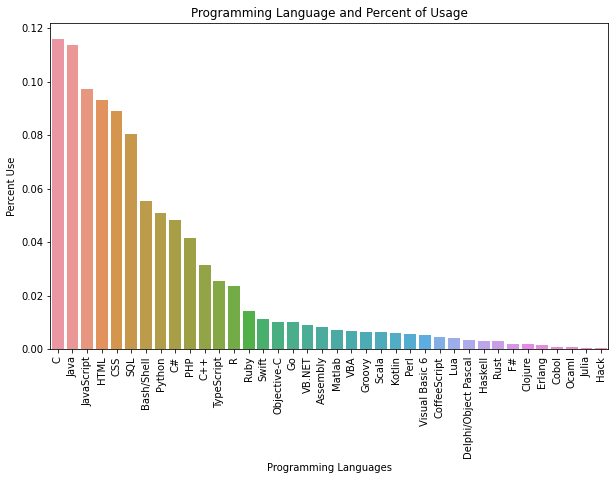

In [17]:
### Visualize the percentage of each language used in 2018
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
graph_2018 = sns.barplot(x=df_lang18.index,y=df_lang18['Percent Use'],ax=ax)
graph_2018.set_xticklabels(graph_2018.get_xticklabels(),rotation=90);
graph_2018.set(xlabel='Programming Languages')
graph_2018.set_title("Programming Language and Percent of Usage");

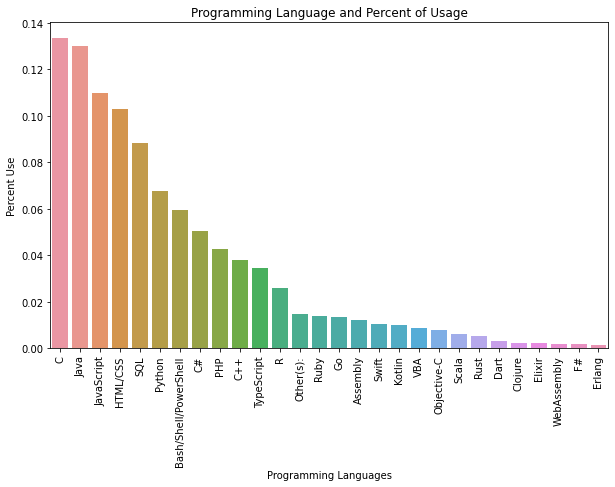

In [18]:
### Visualize the percentage of each language used in 2019
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
graph_2019 = sns.barplot(x=df_lang19.index,y=df_lang19['Percent Use'],ax=ax)
graph_2019.set_xticklabels(graph_2019.get_xticklabels(),rotation=90);
graph_2019.set(xlabel='Programming Languages')
graph_2019.set_title("Programming Language and Percent of Usage");

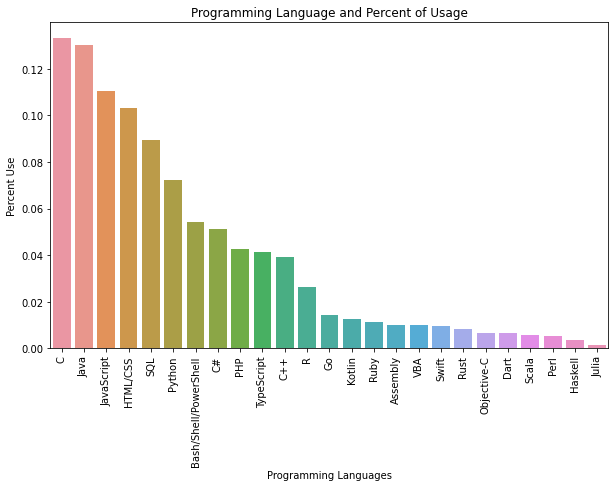

In [19]:
### Visualize the percentage of each language used in 2020
fig_dims = (10, 6)
fig, ax = plt.subplots(figsize=fig_dims)
graph_2020 = sns.barplot(x=df_lang20.index,y=df_lang20['Percent Use'],ax=ax)
graph_2020.set_xticklabels(graph_2020.get_xticklabels(),rotation=90);
graph_2020.set(xlabel='Programming Languages')
graph_2020.set_title("Programming Language and Percent of Usage");

In [20]:
### Merge all dataframes to see the trend over time.
df_18_19 = pd.merge(df_lang18,df_lang19,left_index=True,right_index=True)
df_18_19_20 = pd.merge(df_18_19, df_lang20, left_index=True,right_index=True)
df_18_19_20.columns=['Count of Language 2018','Percent Use 2018','Count of Language 2019','Percent Use 2019',
                    'Count of Language 2020','Percent Use 2020']

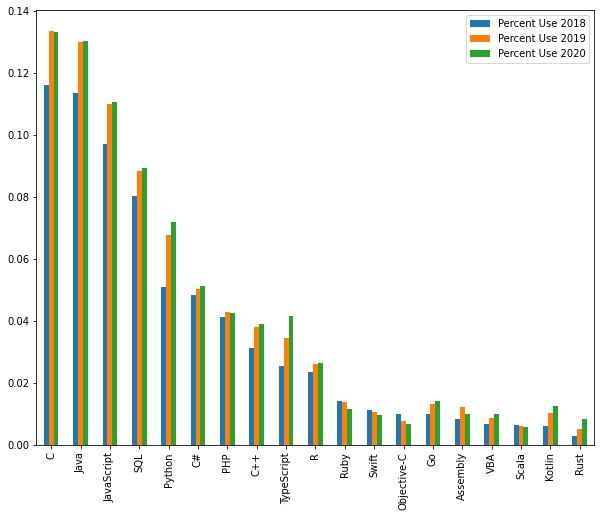

In [21]:
df_18_19_20[['Percent Use 2018','Percent Use 2019','Percent Use 2020']].plot.bar(figsize=(10,8));


## Evaluation

We can see that C, Java, and Javascript is the most used language from 2018 to 2020, however we notice that Python, C++, SQL, and TypeScript are increasing in use for the past three years as well.